In [1]:
import numpy as np;
import csv
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from time import time

In [2]:
data = pd.read_csv('NMC_numerical_new.csv')

np.random.seed(1001)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]
    test_row = round(total_row *test_ratio)
    train_row = total_row -test_row
    indices =np.random.permutation(total_row)
    train_indx, test_idx =indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test.iloc[:,0:20]
    y_test = test.iloc [:,21]
    X_train = train.iloc[:,0:20]
    y_train = train.iloc [:,21]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)

kf = KFold(n_splits=5,random_state =1001,shuffle= True)



In [3]:
len(data)

168

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = pd.DataFrame(scaling.transform(X_test))

In [4]:
clf = StandardScaler(with_mean=True,with_std=True)
print(clf.fit(X_test))
print(clf.mean_)

X_test = pd.DataFrame(clf.transform(X_test))

print(clf.fit(X_train))
print(clf.mean_)
X_train = pd.DataFrame(clf.transform(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.05208824e+00 4.25588235e-01 1.81647059e-01 3.15529412e-01
 2.68823529e-02 2.86428529e+00 1.42256471e+01 1.01076471e+02
 1.13000000e+02 2.54117647e+00 4.52352941e+00 6.67797059e+01
 9.23191176e+01 2.94411765e+01 1.44000000e+00 1.38529412e+01
 6.39323529e+02 3.96500000e-01 1.80500000e+02 1.53970588e+02]
StandardScaler(copy=True, with_mean=True, with_std=True)
[1.05261940e+00 4.51925373e-01 1.75783582e-01 2.91761194e-01
 2.78283582e-02 2.86454104e+00 1.42276515e+01 1.01108015e+02
 1.18234328e+02 2.53358209e+00 4.52611940e+00 6.84517164e+01
 9.22191791e+01 3.01791045e+01 1.48156716e+00 1.45074627e+01
 6.33216418e+02 4.24947761e-01 1.75328358e+02 1.53992537e+02]


In [143]:
rand_para = {'C':range(291,411),'gamma':np.logspace(-2,-1),'kernel':['rbf']}
svm_model =SVR()
n_iteration = 20000
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(svm_model,param_distributions=rand_para,cv =5,scoring=Scoring,
                                   error_score=0,random_state=1001,return_train_score=True,n_jobs=-1,n_iter=n_iteration,verbose=10,refit=False)


start = time()

random_search.fit(X_train,y_train)

#y_predict=random_search.predict(X_test)
#math.sqrt(stcs.mean((y_predict-y_test)**2))



Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


/Users/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6000 is smaller than n_iter=20000. Running 6000 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1875s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too fast 

limit_output extension: Maximum message size of 1000 exceeded with 1095 characters

In [144]:
a=pd.DataFrame(random_search.cv_results_)

model=random_search.best_params_

y_predict= random_search.predict(X_test)
math.sqrt(stcs.mean((y_predict-y_test)**2))

y_predict=random_search.predict(X_test)
math.sqrt(stcs.mean((y_predict-y_test)**2))

In [145]:
a.to_csv('T3_EC_NMC_SVR_hp_5_fold.csv')

# Model training

In [5]:
svm_model_optimal =SVR(kernel ='rbf',gamma=0.044984327,C=281.1768698)
np.random.seed(1001)
svm_model_optimal.fit(X_train,y_train)
y_predict=svm_model_optimal.predict(X_test)

In [6]:
math.sqrt(stcs.mean((y_predict-y_test)**2))

19.38318126014342

In [7]:
math.sqrt(stcs.mean((y_predict-y_test)**2))

SS_res = sum((y_predict-y_test)**2)
SS_tot = sum((y_test-stcs.mean(y_test))**2)

1-SS_res/SS_tot

0.41205272590071185

import numpy
import matplotlib.axes as ax
import matplotlib.pyplot as plt

x= y_test
y=y_predict 

plt.axis([50,300,50,300])
plt.scatter(y=results.iloc[:,1],x=results.iloc[:,0],c='deepskyblue',label='Training')
plt.scatter(x,y, c='blue',label='Test')
plt.plot([50,300],[50,300],label ='True line',c='red')
plt.legend(loc='lower right')
plt.title(label='SVM-EC-Results-Plot')

plt.xlabel('Experimental 50th cycle Discharge Capacity (mAh/g)')
plt.ylabel('Predicted 50th cycle Discharge Capacity (mAh/g)')
plt.text(60,230,r'$RMSE_{train}=19.66mAgh^{-1}$'+'\n'+r'$RMSE_{test}=23.28mAgh^{-1}$' +"\n"+ '$R^2_{test}=0.31$')

plt.savefig('SVM-EC-Predicted-vs-test.png',dpi=500)
plt.show()



In [8]:
np.random.seed(1001)

svm_model_train =SVR(kernel ='rbf',gamma=0.044984327,C=126.4855217)

train_results =[]
train_results_name =['Experimental IC','Predicted IC','RMSE']


for train_index, test_index in kf.split(X_train):
    #print("Train:", train_index, "Validation:", test_index)
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    np.random.seed(1001)
    svm_model_train.fit(X_training,y_training)
    y_train_predicted = svm_model_train.predict(X_validate)
    number_ob =X_validate.shape[0]
    squared_deviations=(y_train_predicted-y_validate)**2
    RMSE=math.sqrt(squared_deviations.sum()/number_ob)
    #RMSE = math.sqrt(stcs.mean((y_train_predicted-y_validate)**2))
    train_results.append([y_validate,y_train_predicted,RMSE])


In [9]:
Train_results =pd.DataFrame (train_results,columns=train_results_name)

In [10]:
np.average(Train_results['RMSE'])

22.003892239590357

In [20]:
predict_results = pd.DataFrame (Train_results.iloc[:,1])

#predict_results.drop(labels=None)

In [21]:
Experimental =[]
Predicted =[]

for i in range(Train_results.shape[0]):
    Ex=Train_results.iloc[i,0].to_string(index=False)
    Pred = pd.DataFrame(Train_results.iloc[i,1]).to_string(index_names=False,index=False,header=False)
    Ex_num = Ex.split("\n ")
    Pre = Pred.split("\n ")
    a = np.array([float(i) for i in Ex_num])
    b = np.array([float(c) for c in Pre])
    Experimental.extend(a)
    Predicted.extend(b)


In [22]:
Ex= pd.DataFrame(Experimental)

Pred = pd.DataFrame(Predicted)

results =pd.concat([Ex,Pred],axis=1,sort=False)

In [215]:
results.to_csv('SVM-EC-TRAIN-EXPERIMENT-PREDICTED.csv')

In [23]:
Pre_y_test = pd.DataFrame(y_predict,index=None)

In [24]:
Ex_y_test =pd.DataFrame(y_test)
Ex_y_test.reset_index(drop=True, inplace=True)

In [25]:
results_test =pd.concat([Ex_y_test,Pre_y_test],axis=1,join='inner')

In [221]:
results_test.to_csv('SVM-EC-TEST--EXPERIMENT-PREDICTED.csv')

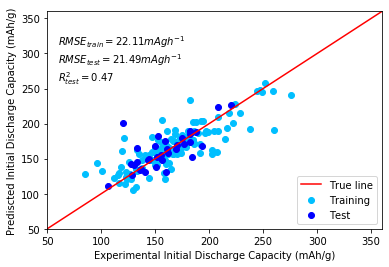

In [26]:
import numpy
import matplotlib.axes as ax
import matplotlib.pyplot as plt

x= y_test
y=y_predict 

plt.axis([50,360,50,360])
plt.scatter(y=results.iloc[:,1],x=results.iloc[:,0],c='deepskyblue',label='Training')
plt.scatter(x,y, c='blue',label='Test')
plt.plot([50,360],[50,360],label ='True line',c='red')
plt.legend(loc='lower right')
#plt.title(label='SVM-EC-Results-Plot')

plt.xlabel(r'Experimental Initial Discharge Capacity (mAh/g)')
plt.ylabel(r'Prediscted Initial Discharge Capacity (mAh/g)')
plt.text(60,260,r'$RMSE_{train}=22.11mAgh^{-1}$'+'\n'+r'$RMSE_{test}=21.49 mAgh^{-1}$' +"\n"+ '$R^2_{test}=0.47$')

#plt.savefig('SVM-IC-Predicted-vs-test.png',dpi=600)
plt.show()

